In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_validate
import imblearn
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text, plot_tree

#### Let's load and examine the data

In [2]:
df = pd.read_csv("zipped_data/telecom_customer_churn.csv", index_col=0)
df.head()

Gender  Age Married  Number of Dependents          City  \
Customer ID                                                            
0002-ORFBO   Female   37     Yes                     0  Frazier Park   
0003-MKNFE     Male   46      No                     0      Glendale   
0004-TLHLJ     Male   50      No                     0    Costa Mesa   
0011-IGKFF     Male   78     Yes                     0      Martinez   
0013-EXCHZ   Female   75     Yes                     0     Camarillo   

             Zip Code   Latitude   Longitude  Number of Referrals  \
Customer ID                                                         
0002-ORFBO      93225  34.827662 -118.999073                    2   
0003-MKNFE      91206  34.162515 -118.203869                    0   
0004-TLHLJ      92627  33.645672 -117.922613                    0   
0011-IGKFF      94553  38.014457 -122.115432                    1   
0013-EXCHZ      93010  34.227846 -119.079903                    3   

             Tenure in Months  ...   Payment Method Monthly Charge  \
Customer ID                    ...                                   
0002-ORFBO                  9  ...      Credit Card           65.6   
0003-MKNFE                  9  ...      Credit Card           -4.0   
0004-TLHLJ                  4  ...  Bank Withdrawal           73.9   
0011-IGKFF                 13  ...  Bank Withdrawal           98.0   
0013-EXCHZ                  3  ...      Credit Card           83.9   

             Total Charges Total Refunds Total Extra Data Charges  \
Customer ID                                                         
0002-ORFBO          593.30          0.00                        0   
0003-MKNFE          542.40         38.33                       10   
0004-TLHLJ          280.85          0.00                        0   
0011-IGKFF         1237.85          0.00                        0   
0013-EXCHZ          267.40          0.00                        0   

            Total Long Distance Charges  Total Revenue Customer Status  \
Customer ID                                                              
0002-ORFBO                       381.51         974.81          Stayed   
0003-MKNFE                        96.21         610.28          Stayed   
0004-TLHLJ                       134.60         415.45         Churned   
0011-IGKFF                       361.66        1599.51         Churned   
0013-EXCHZ                        22.14         289.54         Churned   

              Churn Category                   Churn Reason  
Customer ID                                                  
0002-ORFBO               NaN                            NaN  
0003-MKNFE               NaN                            NaN  
0004-TLHLJ        Competitor  Competitor had better devices  
0011-IGKFF   Dissatisfaction        Product dissatisfaction  
0013-EXCHZ   Dissatisfaction            Network reliability  

[5 rows x 37 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              3166 non-null   object 
 11  Phone Service                      7043 non-nu

In [4]:
# Check for duplicate rows
df.duplicated().sum()

0

In [5]:
# Count missing values in each column
df.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                   

In [6]:
# Calculate the percentage of missing values in each column
(df.isnull().sum() * 100 / len(df)).round(2)

Gender                                0.00
Age                                   0.00
Married                               0.00
Number of Dependents                  0.00
City                                  0.00
Zip Code                              0.00
Latitude                              0.00
Longitude                             0.00
Number of Referrals                   0.00
Tenure in Months                      0.00
Offer                                55.05
Phone Service                         0.00
Avg Monthly Long Distance Charges     9.68
Multiple Lines                        9.68
Internet Service                      0.00
Internet Type                        21.67
Avg Monthly GB Download              21.67
Online Security                      21.67
Online Backup                        21.67
Device Protection Plan               21.67
Premium Tech Support                 21.67
Streaming TV                         21.67
Streaming Movies                     21.67
Streaming M

In [7]:
# Let's get unique values and their count for each columns
unique_values_dict = {col: df[col].unique() for col in df.columns}

for column, unique_vals in unique_values_dict.items():
    unique_count = len(unique_vals)
    print(f"Unique values in column '{column}' ({unique_count}): {unique_vals}", '\n')

Unique values in column 'Gender' (2): ['Female' 'Male'] 

Unique values in column 'Age' (62): [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65] 

Unique values in column 'Married' (2): ['Yes' 'No'] 

Unique values in column 'Number of Dependents' (10): [0 3 1 2 4 6 5 9 7 8] 

Unique values in column 'City' (1106): ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley'] 

Unique values in column 'Zip Code' (1626): [93225 91206 92627 ... 91934 93013 95956] 

Unique values in column 'Latitude' (1626): [34.827662 34.162515 33.645672 ... 32.649787 34.441398 39.937017] 

Unique values in column 'Longitude' (1625): [-118.999073 -118.203869 -117.922613 ... -116.2237   -119.513163
 -121.058043] 

Unique values in column 'Number of Referrals' (12): [ 2  0  1  3  8  9 10  5  4  7  6 11] 

Unique values in column 'Tenure in Months

#### Now let's deal with missing values

In [8]:
# Replace missing values in the 'Offer' column with 'No offer'
df['Offer'] = df['Offer'].fillna('No offer')

In [9]:
df['Phone Service'].value_counts()

Phone Service
Yes    6361
No      682
Name: count, dtype: int64

#### When 'Phone Service' value is 'No', 'Avg Monthly Long Distance Charges' and 'Multiple Lines' columns have missing values

In [10]:
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].fillna(0)
df['Multiple Lines'] = df['Multiple Lines'].fillna('No Phone Service')

#### When 'Internet Service' value is 'No', the following columns have missing values:
- Internet Type                        
- Avg Monthly GB Download            
- Online Security                     
- Online Backup                    
- Device Protection Plan          
- Premium Tech Support                
- Streaming TV                    
- Streaming Movies                   
- Streaming Music                     
- Unlimited Data

In [11]:
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].fillna(0)
df['Internet Type'] = df['Internet Type'].fillna('No Internet Service')

# List of columns to replace missing values with 'No Internet Service'
columns_to_replace = ['Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
                     'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

# Replace missing values in these columns
df[columns_to_replace] = df[columns_to_replace].fillna('No Internet Service')

#### Remove irrelevant columns

In [12]:
irrelevant_cols = ['City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Category', 'Churn Reason']
df.drop(irrelevant_cols, axis=1, inplace=True)

In [13]:
# Calculate the percentage of missing values in each column
(df.isnull().sum() * 100 / len(df)).round(2)

Gender                               0.0
Age                                  0.0
Married                              0.0
Number of Dependents                 0.0
Number of Referrals                  0.0
Tenure in Months                     0.0
Offer                                0.0
Phone Service                        0.0
Avg Monthly Long Distance Charges    0.0
Multiple Lines                       0.0
Internet Service                     0.0
Internet Type                        0.0
Avg Monthly GB Download              0.0
Online Security                      0.0
Online Backup                        0.0
Device Protection Plan               0.0
Premium Tech Support                 0.0
Streaming TV                         0.0
Streaming Movies                     0.0
Streaming Music                      0.0
Unlimited Data                       0.0
Contract                             0.0
Paperless Billing                    0.0
Payment Method                       0.0
Monthly Charge  

## Visualize th edistribution of Categorical Variables

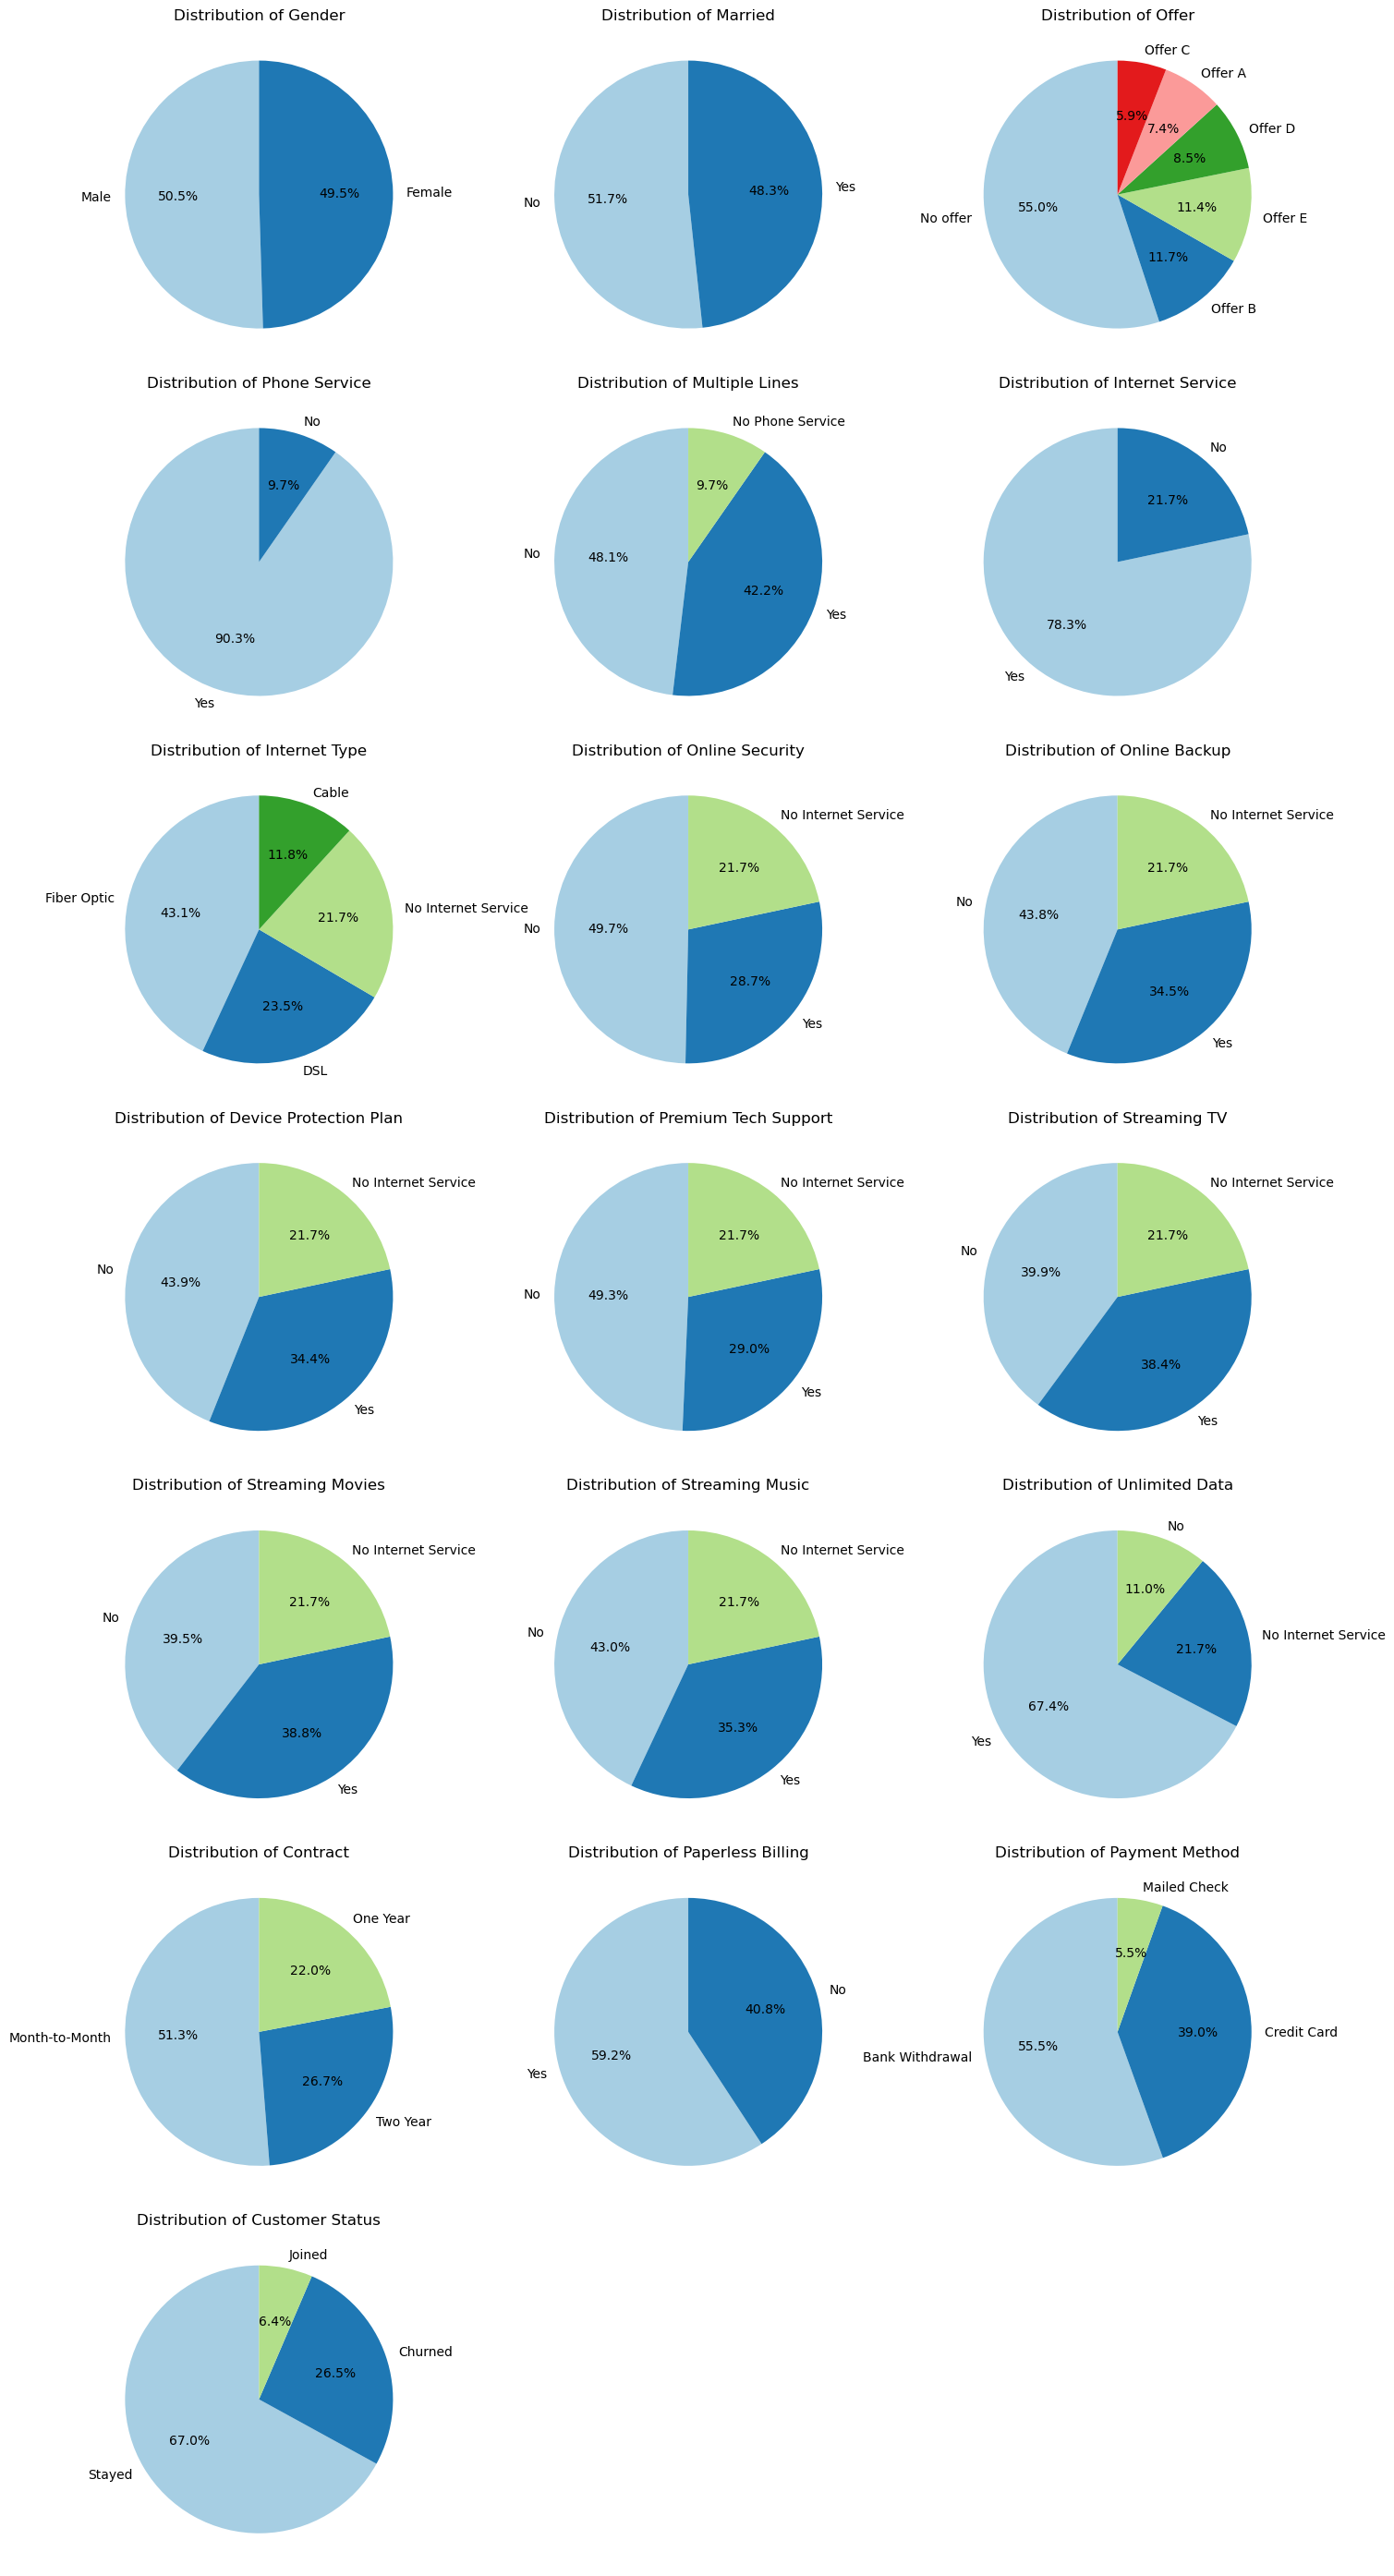

In [14]:
# Get all categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Define number of columns per row
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate required rows

# Set up subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize for compact layout
axes = axes.flatten()  # Flatten to iterate easily

# Plot each categorical variable as a pie chart
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors, 
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel('')  # Remove y-axis label for cleaner look

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Visualize the distribution of Numerical Variables

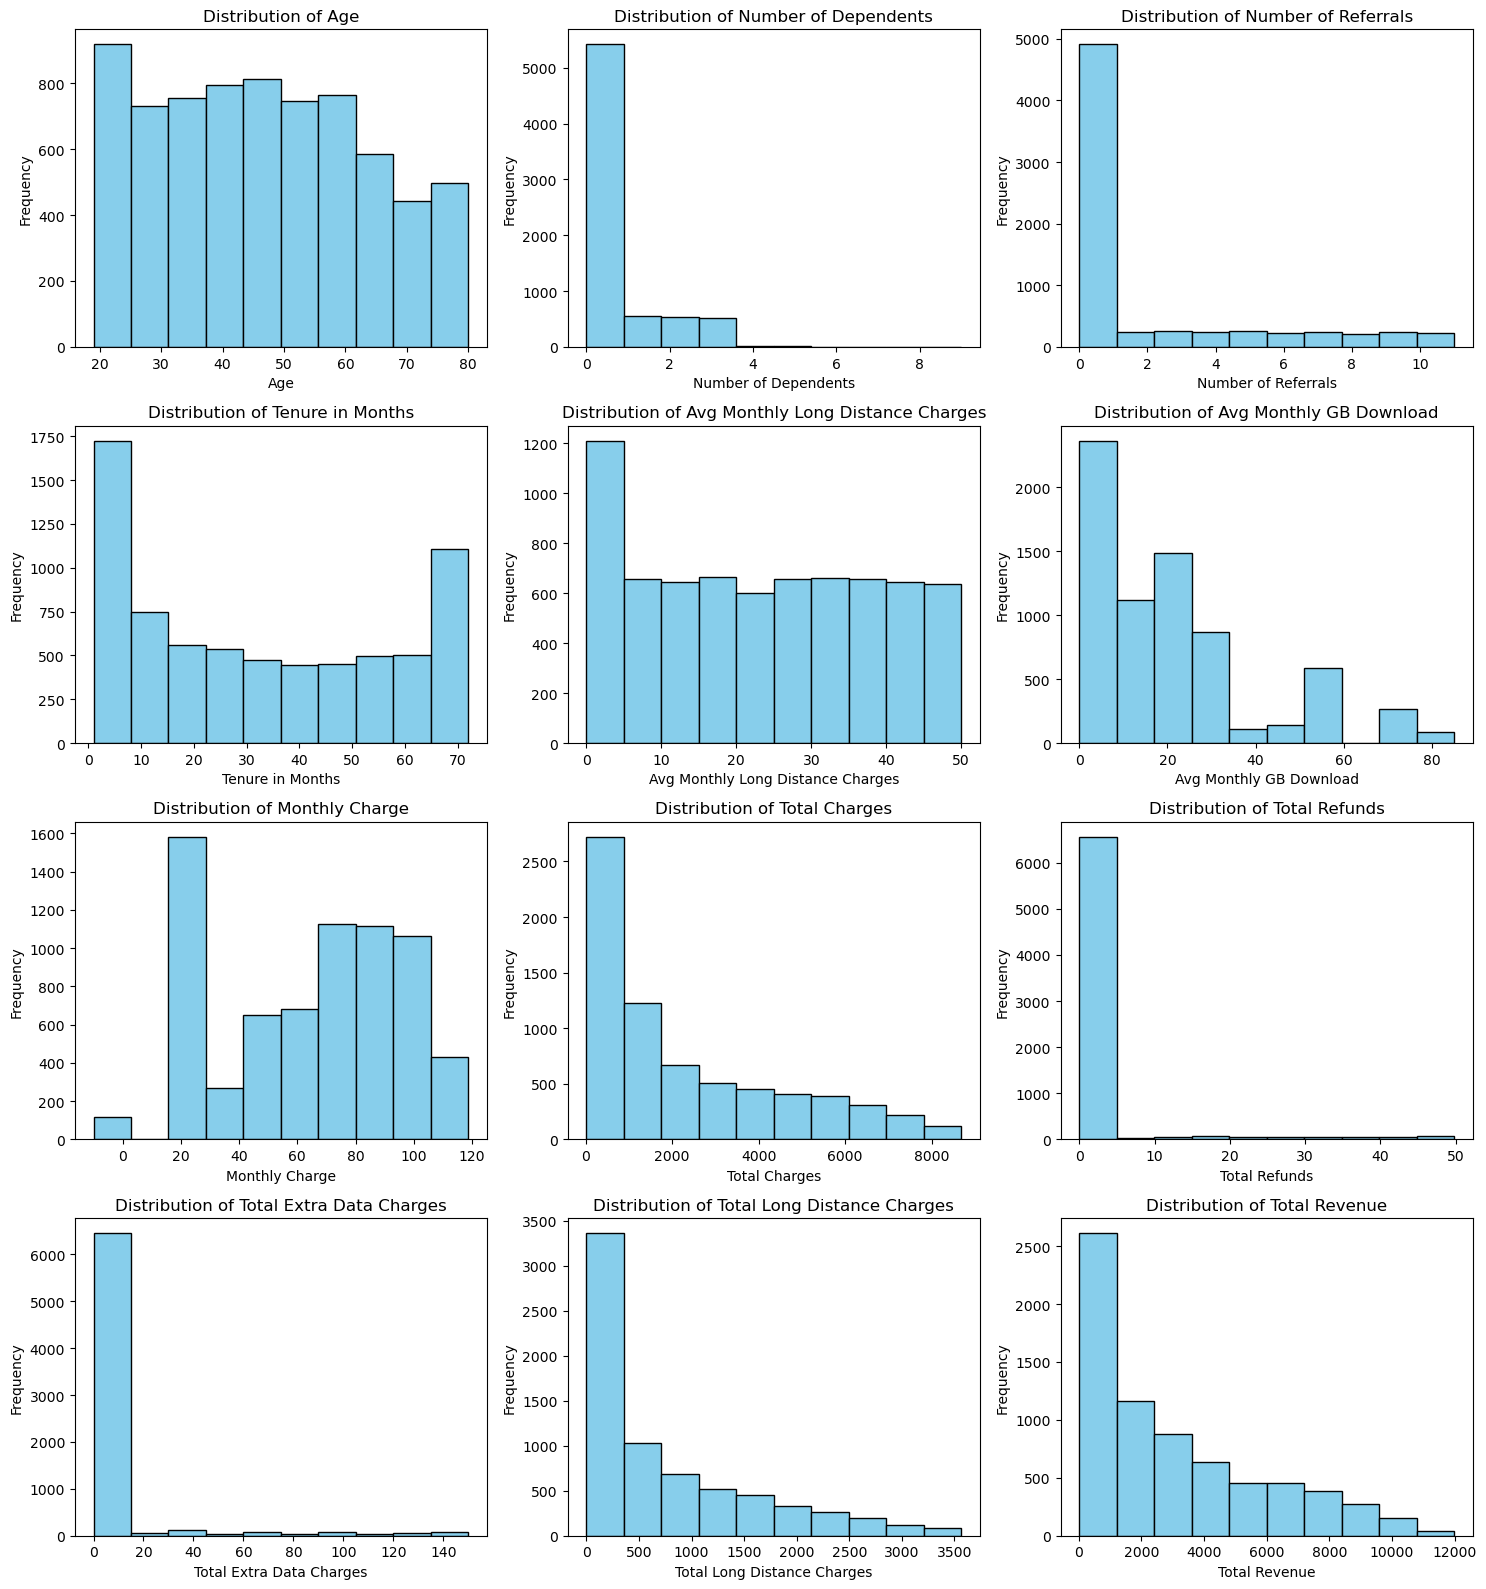

In [15]:
# Get all numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define number of columns per row
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate required rows

# Set up subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Plot each numerical variable as a histogram
for i, col in enumerate(numerical_columns):
    df[col].plot.hist(bins=10, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(col)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Feature Reduction for Numeric Columns

### Correlation Analysis

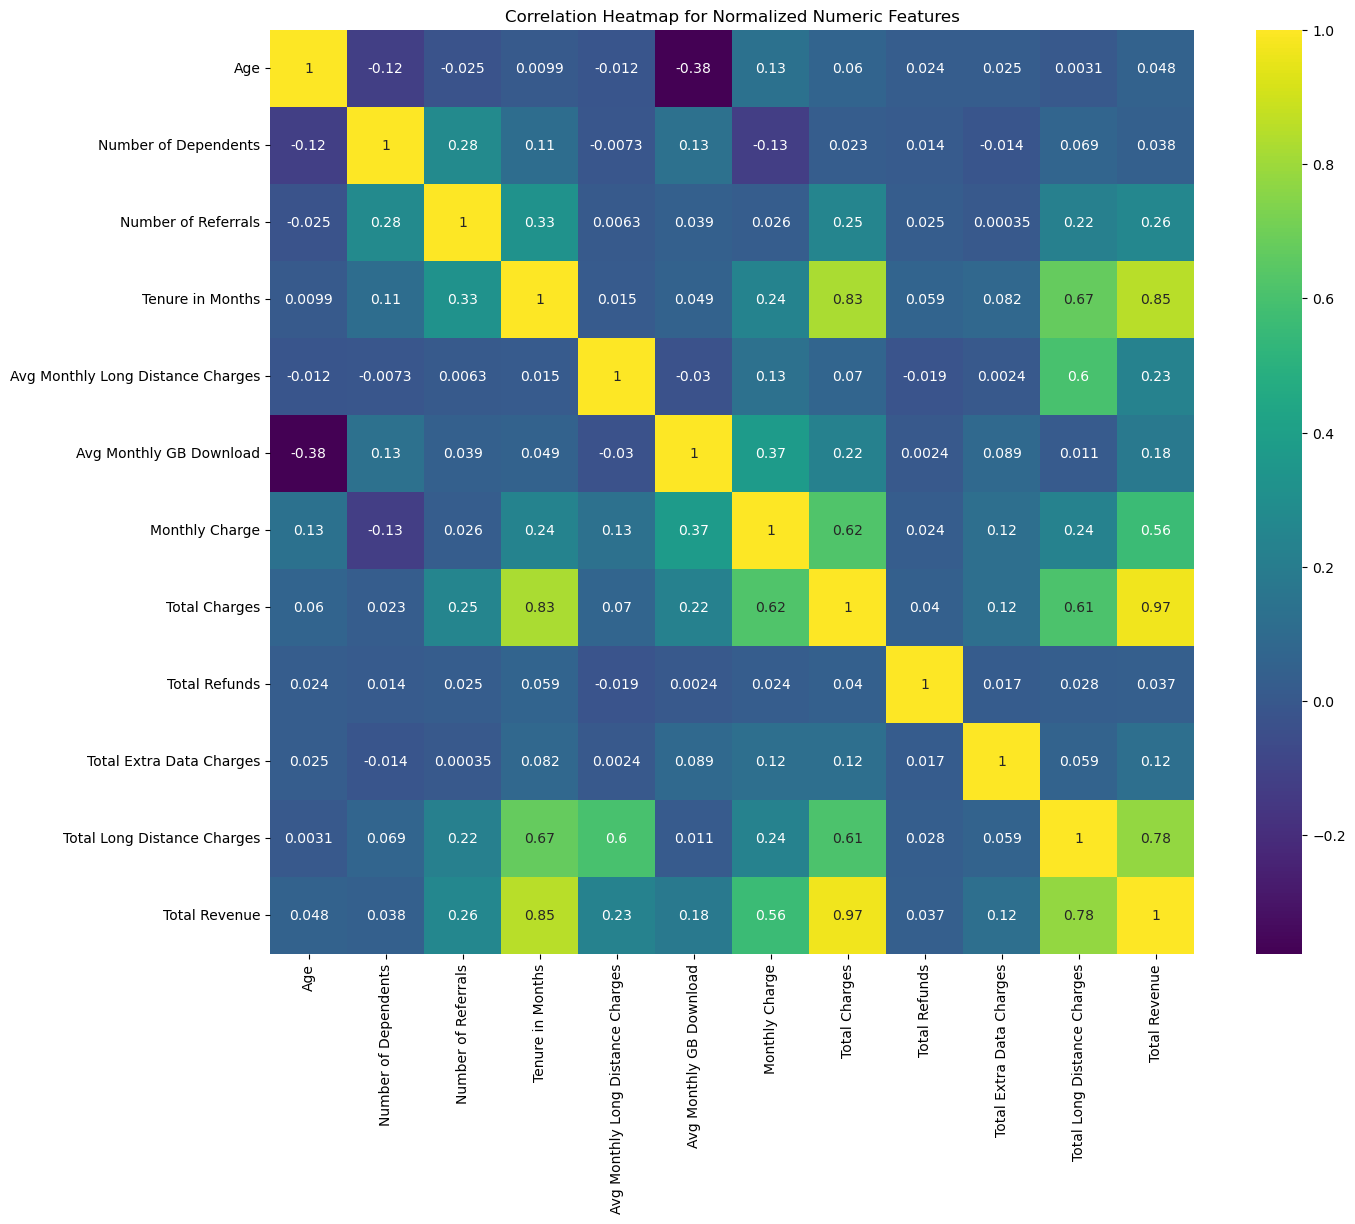

In [16]:
# Correlation Heatmap for Numeric Columns

# Select and normalize only the numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)
normalized_df = pd.DataFrame(normalized_data, columns=numeric_data.columns)

# Compute the correlation matrix on normalized data
correlation_matrix = normalized_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', square=True)
plt.title("Correlation Heatmap for Normalized Numeric Features")
plt.show()

#### Let's remove highly correlated variables

In [17]:
df.drop(['Tenure in Months', 'Total Revenue'], axis=1, inplace=True)

### Let's make it a binary classification problem

In [18]:
# For the Class category, combine 'Stayed' and 'Joined' values  
df['Customer Status'] = df['Customer Status'].map({'Churned': 1, 'Stayed': 0, 'Joined': 0})

### Visualize the target class ('Customer Status') distribution for different categories

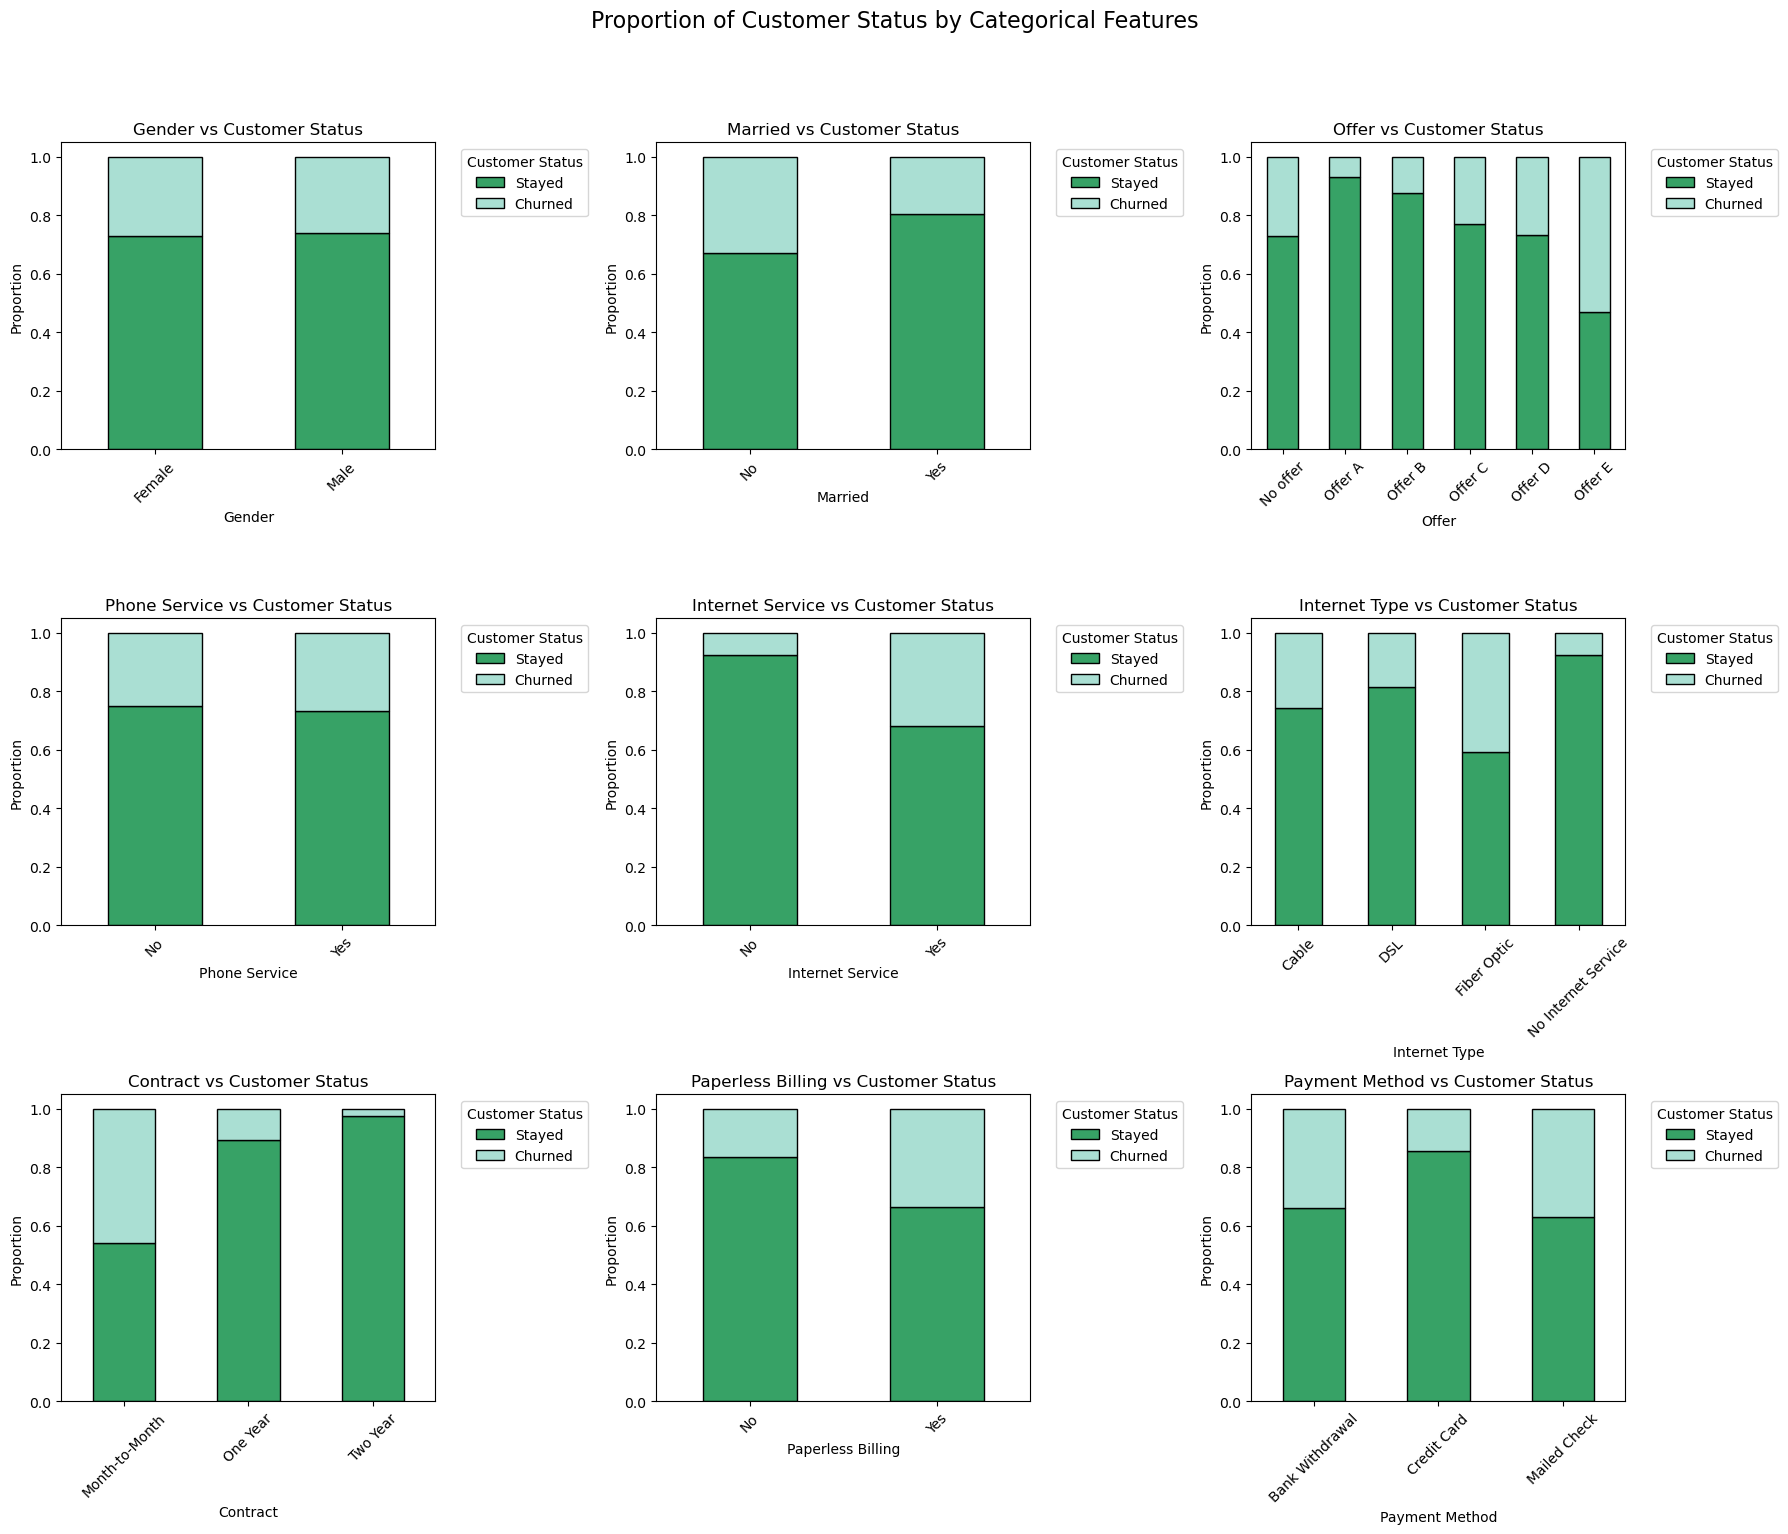

In [19]:
# List of columns to analyze
columns_to_plot = ['Gender', 'Married', 'Offer', 'Phone Service', 'Internet Service', 
                   'Internet Type', 'Contract', 'Paperless Billing', 'Payment Method']

# Plotting setup for a grid of subplots
n_cols = 3  # Number of columns per row
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate rows needed

# Color palette for a blue-green color scheme
palette = sns.color_palette("BuGn_r", len(df['Customer Status'].unique()))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
fig.suptitle('Proportion of Customer Status by Categorical Features', fontsize=16, y=1.02)

# Loop through each column and create a side-by-side bar plot for each feature
for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, n_cols)  # Determine row and column for current plot
    
    # Calculate proportions for each category within the column
    status_proportion = pd.crosstab(index=df[column], columns=df['Customer Status'], normalize='index')
    
    # Plot side-by-side bar chart
    status_proportion.plot(kind='bar', stacked=True, ax=axes[row, col], color=palette, edgecolor='black')
    
    axes[row, col].set_title(f'{column} vs Customer Status')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Proportion')
    
    # Custom legend labels
    custom_labels = ['Stayed', 'Churned']
    handles, _ = axes[row, col].get_legend_handles_labels()
    axes[row, col].legend(handles=handles, labels=custom_labels, title='Customer Status',
                          bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[row, col].tick_params(axis='x', rotation=45)

# Remove unused axes if columns_to_plot isn't a multiple of n_cols
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Feature Reduction for Categorical Columns

In [20]:
categorical_cols = df.select_dtypes(include=['object']).columns

#### CHeck for Low-Variance Categories

In [21]:
# Set a threshold for low-variance category (e.g., 95%)
threshold = 0.95

# Identify low-variance categorical columns
low_variance_cols = [col for col in df.select_dtypes(include='object').columns 
                     if df[col].value_counts(normalize=True).iloc[0] > threshold]

low_variance_cols

[]

### Split the data into target and predictors

In [22]:
# Define appropriate X and y
y = df['Customer Status']
X = df.drop('Customer Status', axis=1)

In [23]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Logistic Regression Classifier

##### Dealing with Categorical Data and One Hot Encoding

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 9495-SKLKD to 8003-EWNDZ
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             5282 non-null   object 
 1   Age                                5282 non-null   int64  
 2   Married                            5282 non-null   object 
 3   Number of Dependents               5282 non-null   int64  
 4   Number of Referrals                5282 non-null   int64  
 5   Offer                              5282 non-null   object 
 6   Phone Service                      5282 non-null   object 
 7   Avg Monthly Long Distance Charges  5282 non-null   float64
 8   Multiple Lines                     5282 non-null   object 
 9   Internet Service                   5282 non-null   object 
 10  Internet Type                      5282 non-null   object 
 11  Avg Monthly GB Download            5282 non-nu

In [25]:
X_train_categorical = X_train.select_dtypes(exclude=["int64", "float64"]).copy()
X_train_categorical

Gender Married     Offer Phone Service Multiple Lines  \
Customer ID                                                          
9495-SKLKD     Male     Yes  No offer           Yes            Yes   
6502-MJQAE     Male      No  No offer           Yes             No   
3166-PNEOF   Female      No   Offer B           Yes            Yes   
2722-VOJQL     Male      No  No offer           Yes            Yes   
9399-APLBT   Female     Yes  No offer           Yes             No   
...             ...     ...       ...           ...            ...   
6080-TCMYC     Male     Yes  No offer           Yes            Yes   
2207-RYYRL     Male     Yes   Offer B           Yes            Yes   
8966-OIQHG   Female     Yes  No offer           Yes             No   
3896-ZVNET   Female     Yes  No offer           Yes            Yes   
8003-EWNDZ   Female      No  No offer           Yes             No   

            Internet Service        Internet Type      Online Security  \
Customer ID                                                              
9495-SKLKD               Yes          Fiber Optic                   No   
6502-MJQAE               Yes          Fiber Optic                   No   
3166-PNEOF               Yes                Cable                  Yes   
2722-VOJQL               Yes          Fiber Optic                   No   
9399-APLBT               Yes          Fiber Optic                   No   
...                      ...                  ...                  ...   
6080-TCMYC               Yes          Fiber Optic                   No   
2207-RYYRL                No  No Internet Service  No Internet Service   
8966-OIQHG                No  No Internet Service  No Internet Service   
3896-ZVNET                No  No Internet Service  No Internet Service   
8003-EWNDZ                No  No Internet Service  No Internet Service   

                   Online Backup Device Protection Plan Premium Tech Support  \
Customer ID                                                                    
9495-SKLKD                   Yes                    Yes                   No   
6502-MJQAE                    No                     No                   No   
3166-PNEOF                    No                    Yes                  Yes   
2722-VOJQL                   Yes                     No                  Yes   
9399-APLBT                   Yes                     No                   No   
...                          ...                    ...                  ...   
6080-TCMYC                    No                    Yes                   No   
2207-RYYRL   No Internet Service    No Internet Service  No Internet Service   
8966-OIQHG   No Internet Service    No Internet Service  No Internet Service   
3896-ZVNET   No Internet Service    No Internet Service  No Internet Service   
8003-EWNDZ   No Internet Service    No Internet Service  No Internet Service   

                    Streaming TV     Streaming Movies      Streaming Music  \
Customer ID                                                                  
9495-SKLKD                    No                  Yes                  Yes   
6502-MJQAE                    No                   No                  Yes   
3166-PNEOF                   Yes                  Yes                  Yes   
2722-VOJQL                   Yes                  Yes                  Yes   
9399-APLBT                    No                   No                   No   
...                          ...                  ...                  ...   
6080-TCMYC                    No                   No                   No   
2207-RYYRL   No Internet Service  No Internet Service  No Internet Service   
8966-OIQHG   No Internet Service  No Internet Service  No Internet Service   
3896-ZVNET   No Internet Service  No Internet Service  No Internet Service   
8003-EWNDZ   No Internet Service  No Internet Service  No Internet Service   

                  Unlimited Data        Contract Paperless Billing  \
Customer ID  

In [26]:
ohe = OneHotEncoder(drop = 'first', handle_unknown="ignore", sparse_output=False)

ohe.fit(X_train_categorical)
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_categorical.index,
    # we are dummying multiple columns at once, so stack the names
    columns=ohe.get_feature_names_out(input_features=X_train_categorical.columns)
)
X_train_ohe

Gender_Male  Married_Yes  Offer_Offer A  Offer_Offer B  \
Customer ID                                                           
9495-SKLKD           1.0          1.0            0.0            0.0   
6502-MJQAE           1.0          0.0            0.0            0.0   
3166-PNEOF           0.0          0.0            0.0            1.0   
2722-VOJQL           1.0          0.0            0.0            0.0   
9399-APLBT           0.0          1.0            0.0            0.0   
...                  ...          ...            ...            ...   
6080-TCMYC           1.0          1.0            0.0            0.0   
2207-RYYRL           1.0          1.0            0.0            1.0   
8966-OIQHG           0.0          1.0            0.0            0.0   
3896-ZVNET           0.0          1.0            0.0            0.0   
8003-EWNDZ           0.0          0.0            0.0            0.0   

             Offer_Offer C  Offer_Offer D  Offer_Offer E  Phone Service_Yes  \
Customer ID                                                                   
9495-SKLKD             0.0            0.0            0.0                1.0   
6502-MJQAE             0.0            0.0            0.0                1.0   
3166-PNEOF             0.0            0.0            0.0                1.0   
2722-VOJQL             0.0            0.0            0.0                1.0   
9399-APLBT             0.0            0.0            0.0                1.0   
...                    ...            ...            ...                ...   
6080-TCMYC             0.0            0.0            0.0                1.0   
2207-RYYRL             0.0            0.0            0.0                1.0   
8966-OIQHG             0.0            0.0            0.0                1.0   
3896-ZVNET             0.0            0.0            0.0                1.0   
8003-EWNDZ             0.0            0.0            0.0                1.0   

             Multiple Lines_No Phone Service  Multiple Lines_Yes  ...  \
Customer ID                                                       ...   
9495-SKLKD                               0.0                 1.0  ...   
6502-MJQAE                               0.0                 0.0  ...   
3166-PNEOF                               0.0                 1.0  ...   
2722-VOJQL                               0.0                 1.0  ...   
9399-APLBT                               0.0                 0.0  ...   
...                                      ...                 ...  ...   
6080-TCMYC                               0.0                 1.0  ...   
2207-RYYRL                               0.0                 1.0  ...   
8966-OIQHG                               0.0                 0.0  ...   
3896-ZVNET                               0.0                 1.0  ...   
8003-EWNDZ                               0.0                 0.0  ...   

             Streaming Movies_Yes  Streaming Music_No Internet Service  \
Customer ID                                                              
9495-SKLKD                    1.0                                  0.0   
6502-MJQAE                    0.0                                  0.0   
3166-PNEOF                    1.0                                  0.0   
2722-VOJQL                    1.0                                  0.0   
9399-APLBT                    0.0                                  0.0   
...                           ...                                  ...   
6080-TCMYC                    0.0                                  0.0   
2207-RYYRL                    0.0                                  1.0   
8966-OIQHG                    0.0                                  1.0   
3896-ZVNET                    0.0                                  1.0   
8003-EWNDZ                    0.0                                  1.0   

             Streaming Music_Yes  Unlimited Data_No Internet Service  \
Customer ID                                                            
9495

##### Normalize the data

In [27]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numeric = X_train[numeric_features].copy()
X_train_numeric

Age  Number of Dependents  Number of Referrals  \
Customer ID                                                   
9495-SKLKD    54                     2                    1   
6502-MJQAE    27                     0                    0   
3166-PNEOF    57                     0                    0   
2722-VOJQL    30                     0                    0   
9399-APLBT    52                     0                    0   
...          ...                   ...                  ...   
6080-TCMYC    55                     3                    4   
2207-RYYRL    34                     1                    6   
8966-OIQHG    49                     2                    8   
3896-ZVNET    42                     3                    7   
8003-EWNDZ    52                     0                    0   

             Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
Customer ID                                                               
9495-SKLKD                               22.31                     19.0   
6502-MJQAE                               46.21                     58.0   
3166-PNEOF                                4.51                     24.0   
2722-VOJQL                               24.23                     73.0   
9399-APLBT                               21.91                      8.0   
...                                        ...                      ...   
6080-TCMYC                                3.52                     56.0   
2207-RYYRL                               29.55                      0.0   
8966-OIQHG                               45.35                      0.0   
3896-ZVNET                               20.74                      0.0   
8003-EWNDZ                               10.46                      0.0   

             Monthly Charge  Total Charges  Total Refunds  \
Customer ID                                                 
9495-SKLKD            95.95        4456.65            0.0   
6502-MJQAE            69.60          69.60            0.0   
3166-PNEOF            86.45        5175.30            0.0   
2722-VOJQL           105.65        6903.10            0.0   
9399-APLBT            74.70          74.70            0.0   
...                     ...            ...            ...   
6080-TCMYC            81.20        3292.30            0.0   
2207-RYYRL            24.55        1331.05            0.0   
8966-OIQHG            20.75         452.35            0.0   
3896-ZVNET            24.70         571.75            0.0   
8003-EWNDZ            21.20         222.65            0.0   

             Total Extra Data Charges  Total Long Distance Charges  
Customer ID                                                         
9495-SKLKD                          0                      1003.95  
6502-MJQAE                          0                        46.21  
3166-PNEOF                          0                       275.11  
2722-VOJQL                          0                      1550.72  
9399-APLBT                          0                        21.91  
...                               ...                          ...  
6080-TCMYC                          0                       140.80  
2207-RYYRL                          0                      1536.60  
8966-OIQHG                          0                       997.70  
3896-ZVNET                          0                       497.76  
8003-EWNDZ                          0                       104.60  

[5282 rows x 10 columns]

#### Let's use a MinMaxScaler from scikit-learn with default parameters to create a maximum value of 1 and a minimum value of 0.

In [28]:
scaler = MinMaxScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

Age  Number of Dependents  Number of Referrals  \
Customer ID                                                        
9495-SKLKD   0.573770              0.222222             0.090909   
6502-MJQAE   0.131148              0.000000             0.000000   
3166-PNEOF   0.622951              0.000000             0.000000   
2722-VOJQL   0.180328              0.000000             0.000000   
9399-APLBT   0.540984              0.000000             0.000000   
...               ...                   ...                  ...   
6080-TCMYC   0.590164              0.333333             0.363636   
2207-RYYRL   0.245902              0.111111             0.545455   
8966-OIQHG   0.491803              0.222222             0.727273   
3896-ZVNET   0.377049              0.333333             0.636364   
8003-EWNDZ   0.540984              0.000000             0.000000   

             Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
Customer ID                                                               
9495-SKLKD                            0.446557                 0.223529   
6502-MJQAE                            0.924940                 0.682353   
3166-PNEOF                            0.090272                 0.282353   
2722-VOJQL                            0.484988                 0.858824   
9399-APLBT                            0.438551                 0.094118   
...                                        ...                      ...   
6080-TCMYC                            0.070456                 0.658824   
2207-RYYRL                            0.591473                 0.000000   
8966-OIQHG                            0.907726                 0.000000   
3896-ZVNET                            0.415132                 0.000000   
8003-EWNDZ                            0.209367                 0.000000   

             Monthly Charge  Total Charges  Total Refunds  \
Customer ID                                                 
9495-SKLKD         0.822913       0.512099            0.0   
6502-MJQAE         0.618252       0.005862            0.0   
3166-PNEOF         0.749126       0.595027            0.0   
2722-VOJQL         0.898252       0.794403            0.0   
9399-APLBT         0.657864       0.006450            0.0   
...                     ...            ...            ...   
6080-TCMYC         0.708350       0.377741            0.0   
2207-RYYRL         0.268350       0.151425            0.0   
8966-OIQHG         0.238835       0.050029            0.0   
3896-ZVNET         0.269515       0.063807            0.0   
8003-EWNDZ         0.242330       0.023523            0.0   

             Total Extra Data Charges  Total Long Distance Charges  
Customer ID                                                         
9495-SKLKD                        0.0                     0.281635  
6502-MJQAE                        0.0                     0.012963  
3166-PNEOF                        0.0                     0.077176  
2722-VOJQL                        0.0                     0.435019  
9399-APLBT                        0.0                     0.006146  
...                               ...                          ...  
6080-TCMYC                        0.0                     0.039498  
2207-RYYRL                        0.0                     0.431058  
8966-OIQHG                        0.0                     0.279882  
3896-ZVNET                        0.0                     0.139635  
8003-EWNDZ                        0.0                     0.029343  

[5282 rows x 10 columns]

In [29]:
# Then we concatenate everything together:
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_full

Age  Number of Dependents  Number of Referrals  \
Customer ID                                                        
9495-SKLKD   0.573770              0.222222             0.090909   
6502-MJQAE   0.131148              0.000000             0.000000   
3166-PNEOF   0.622951              0.000000             0.000000   
2722-VOJQL   0.180328              0.000000             0.000000   
9399-APLBT   0.540984              0.000000             0.000000   
...               ...                   ...                  ...   
6080-TCMYC   0.590164              0.333333             0.363636   
2207-RYYRL   0.245902              0.111111             0.545455   
8966-OIQHG   0.491803              0.222222             0.727273   
3896-ZVNET   0.377049              0.333333             0.636364   
8003-EWNDZ   0.540984              0.000000             0.000000   

             Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
Customer ID                                                               
9495-SKLKD                            0.446557                 0.223529   
6502-MJQAE                            0.924940                 0.682353   
3166-PNEOF                            0.090272                 0.282353   
2722-VOJQL                            0.484988                 0.858824   
9399-APLBT                            0.438551                 0.094118   
...                                        ...                      ...   
6080-TCMYC                            0.070456                 0.658824   
2207-RYYRL                            0.591473                 0.000000   
8966-OIQHG                            0.907726                 0.000000   
3896-ZVNET                            0.415132                 0.000000   
8003-EWNDZ                            0.209367                 0.000000   

             Monthly Charge  Total Charges  Total Refunds  \
Customer ID                                                 
9495-SKLKD         0.822913       0.512099            0.0   
6502-MJQAE         0.618252       0.005862            0.0   
3166-PNEOF         0.749126       0.595027            0.0   
2722-VOJQL         0.898252       0.794403            0.0   
9399-APLBT         0.657864       0.006450            0.0   
...                     ...            ...            ...   
6080-TCMYC         0.708350       0.377741            0.0   
2207-RYYRL         0.268350       0.151425            0.0   
8966-OIQHG         0.238835       0.050029            0.0   
3896-ZVNET         0.269515       0.063807            0.0   
8003-EWNDZ         0.242330       0.023523            0.0   

             Total Extra Data Charges  Total Long Distance Charges  ...  \
Customer ID                                                         ...   
9495-SKLKD                        0.0                     0.281635  ...   
6502-MJQAE                        0.0                     0.012963  ...   
3166-PNEOF                        0.0                     0.077176  ...   
2722-VOJQL                        0.0                     0.435019  ...   
9399-APLBT                        0.0                     0.006146  ...   
...                               ...                          ...  ...   
6080-TCMYC                        0.0                     0.039498  ...   
2207-RYYRL                        0.0                     0.431058  ...   
8966-OIQHG                        0.0                     0.279882  ...   
3896-ZVNET                        0.0                     0.139635  ...   
8003-EWNDZ                        0.0                     0.029343  ...   

             Streaming Movies_Yes  Streaming Music_No Internet Service  \
Customer ID                                                              
9495-SKLKD                    1.0                                  0.0   
6502-MJQAE                    0.0                                  0.0   
3166-PNEOF                    1.0                                  0.0   
2722-VOJQL       

#### Fitting a Model

In [30]:
# Now let's fit a model to the preprocessed training set

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_full, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

#### Model Evaluation

In [31]:
# Performance on Training Data
y_hat_train = logreg.predict(X_train_full)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    4449
1     833
Name: count, dtype: int64

Residuals (proportions)
0    0.842295
1    0.157705
Name: proportion, dtype: float64


####  our classifier was about 84% correct on our training data!

#### Performance on Test Data

In [32]:
# let's apply the same preprocessing process to our test data, 
# so we can evaluate the model's performance on unseen data.

# Handling categorical data
X_test_categorical = X_test.select_dtypes(exclude=["int64", "float64"]).copy()
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=ohe.get_feature_names_out(input_features=X_train_categorical.columns)
)

# Normalization
X_test_numeric = X_test[numeric_features].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full

Age  Number of Dependents  Number of Referrals  \
Customer ID                                                        
8361-LBRDI   0.196721              0.000000             0.000000   
5249-QYHEX   0.131148              0.222222             0.181818   
8845-LWKGE   0.606557              0.111111             0.363636   
8350-NYMVI   0.262295              0.000000             0.000000   
9140-CZQZZ   0.311475              0.000000             0.636364   
...               ...                   ...                  ...   
0731-EBJQB   0.081967              0.000000             0.272727   
2321-OMBXY   0.590164              0.000000             0.090909   
9705-IOVQQ   1.000000              0.222222             0.909091   
4106-HADHQ   0.377049              0.000000             0.090909   
5656-MJEFC   0.475410              0.000000             0.909091   

             Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
Customer ID                                                               
8361-LBRDI                            0.773018                 0.000000   
5249-QYHEX                            0.669335                 0.000000   
8845-LWKGE                            0.735388                 0.211765   
8350-NYMVI                            0.000000                 0.094118   
9140-CZQZZ                            0.959768                 0.164706   
...                                        ...                      ...   
0731-EBJQB                            0.113090                 0.000000   
2321-OMBXY                            0.843475                 0.223529   
9705-IOVQQ                            0.090272                 0.258824   
4106-HADHQ                            0.714572                 0.105882   
5656-MJEFC                            0.000000                 0.094118   

             Monthly Charge  Total Charges  Total Refunds  \
Customer ID                                                 
8361-LBRDI         0.266796       0.162134       0.000000   
5249-QYHEX         0.270291       0.116074       0.000000   
8845-LWKGE         0.578641       0.226904       0.000000   
8350-NYMVI         0.396893       0.182120       0.000000   
9140-CZQZZ         0.695922       0.634318       0.000000   
...                     ...            ...            ...   
0731-EBJQB         0.236117       0.123685       0.000000   
2321-OMBXY         0.701359       0.350779       0.000000   
9705-IOVQQ         0.846602       0.686649       0.425186   
4106-HADHQ         0.699029       0.365122       0.000000   
5656-MJEFC         0.451650       0.232345       0.000000   

             Total Extra Data Charges  Total Long Distance Charges  ...  \
Customer ID                                                         ...   
8361-LBRDI                        0.0                     0.628369  ...   
5249-QYHEX                        0.0                     0.375233  ...   
8845-LWKGE                        0.0                     0.309197  ...   
8350-NYMVI                        0.0                     0.000000  ...   
9140-CZQZZ                        0.0                     0.914686  ...   
...                               ...                          ...  ...   
0731-EBJQB                        0.0                     0.082419  ...   
2321-OMBXY                        0.0                     0.449213  ...   
9705-IOVQQ                        0.0                     0.077176  ...   
4106-HADHQ                        0.0                     0.390578  ...   
5656-MJEFC                        0.0                     0.000000  ...   

             Streaming Movies_Yes  Streaming Music_No Internet Service  \
Customer ID                                                              
8361-LBRDI                    0.0                                  1.0   
5249-QYHEX                    0.0                                  1.0   
8845-LWKGE                    0.0                                  0.0   
8350-NYMVI       

In [33]:
y_hat_test = logreg.predict(X_test_full)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    1443
1     318
Name: count, dtype: int64

Residuals (proportions)
0    0.819421
1    0.180579
Name: proportion, dtype: float64


#### about 82% accurate on our test data.

## Decision Tree Classification

In [34]:
# Train the decision tree
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_full, y_train)

DecisionTreeClassifier(criterion='entropy')

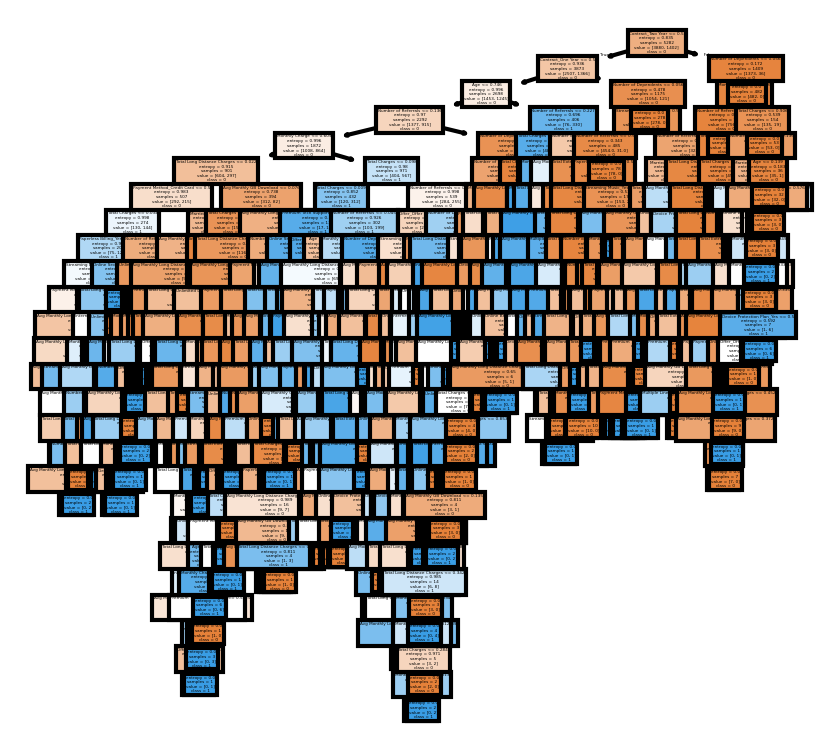

In [35]:
# Plot the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = X_train_full.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

#### This tree clearly overfits. 

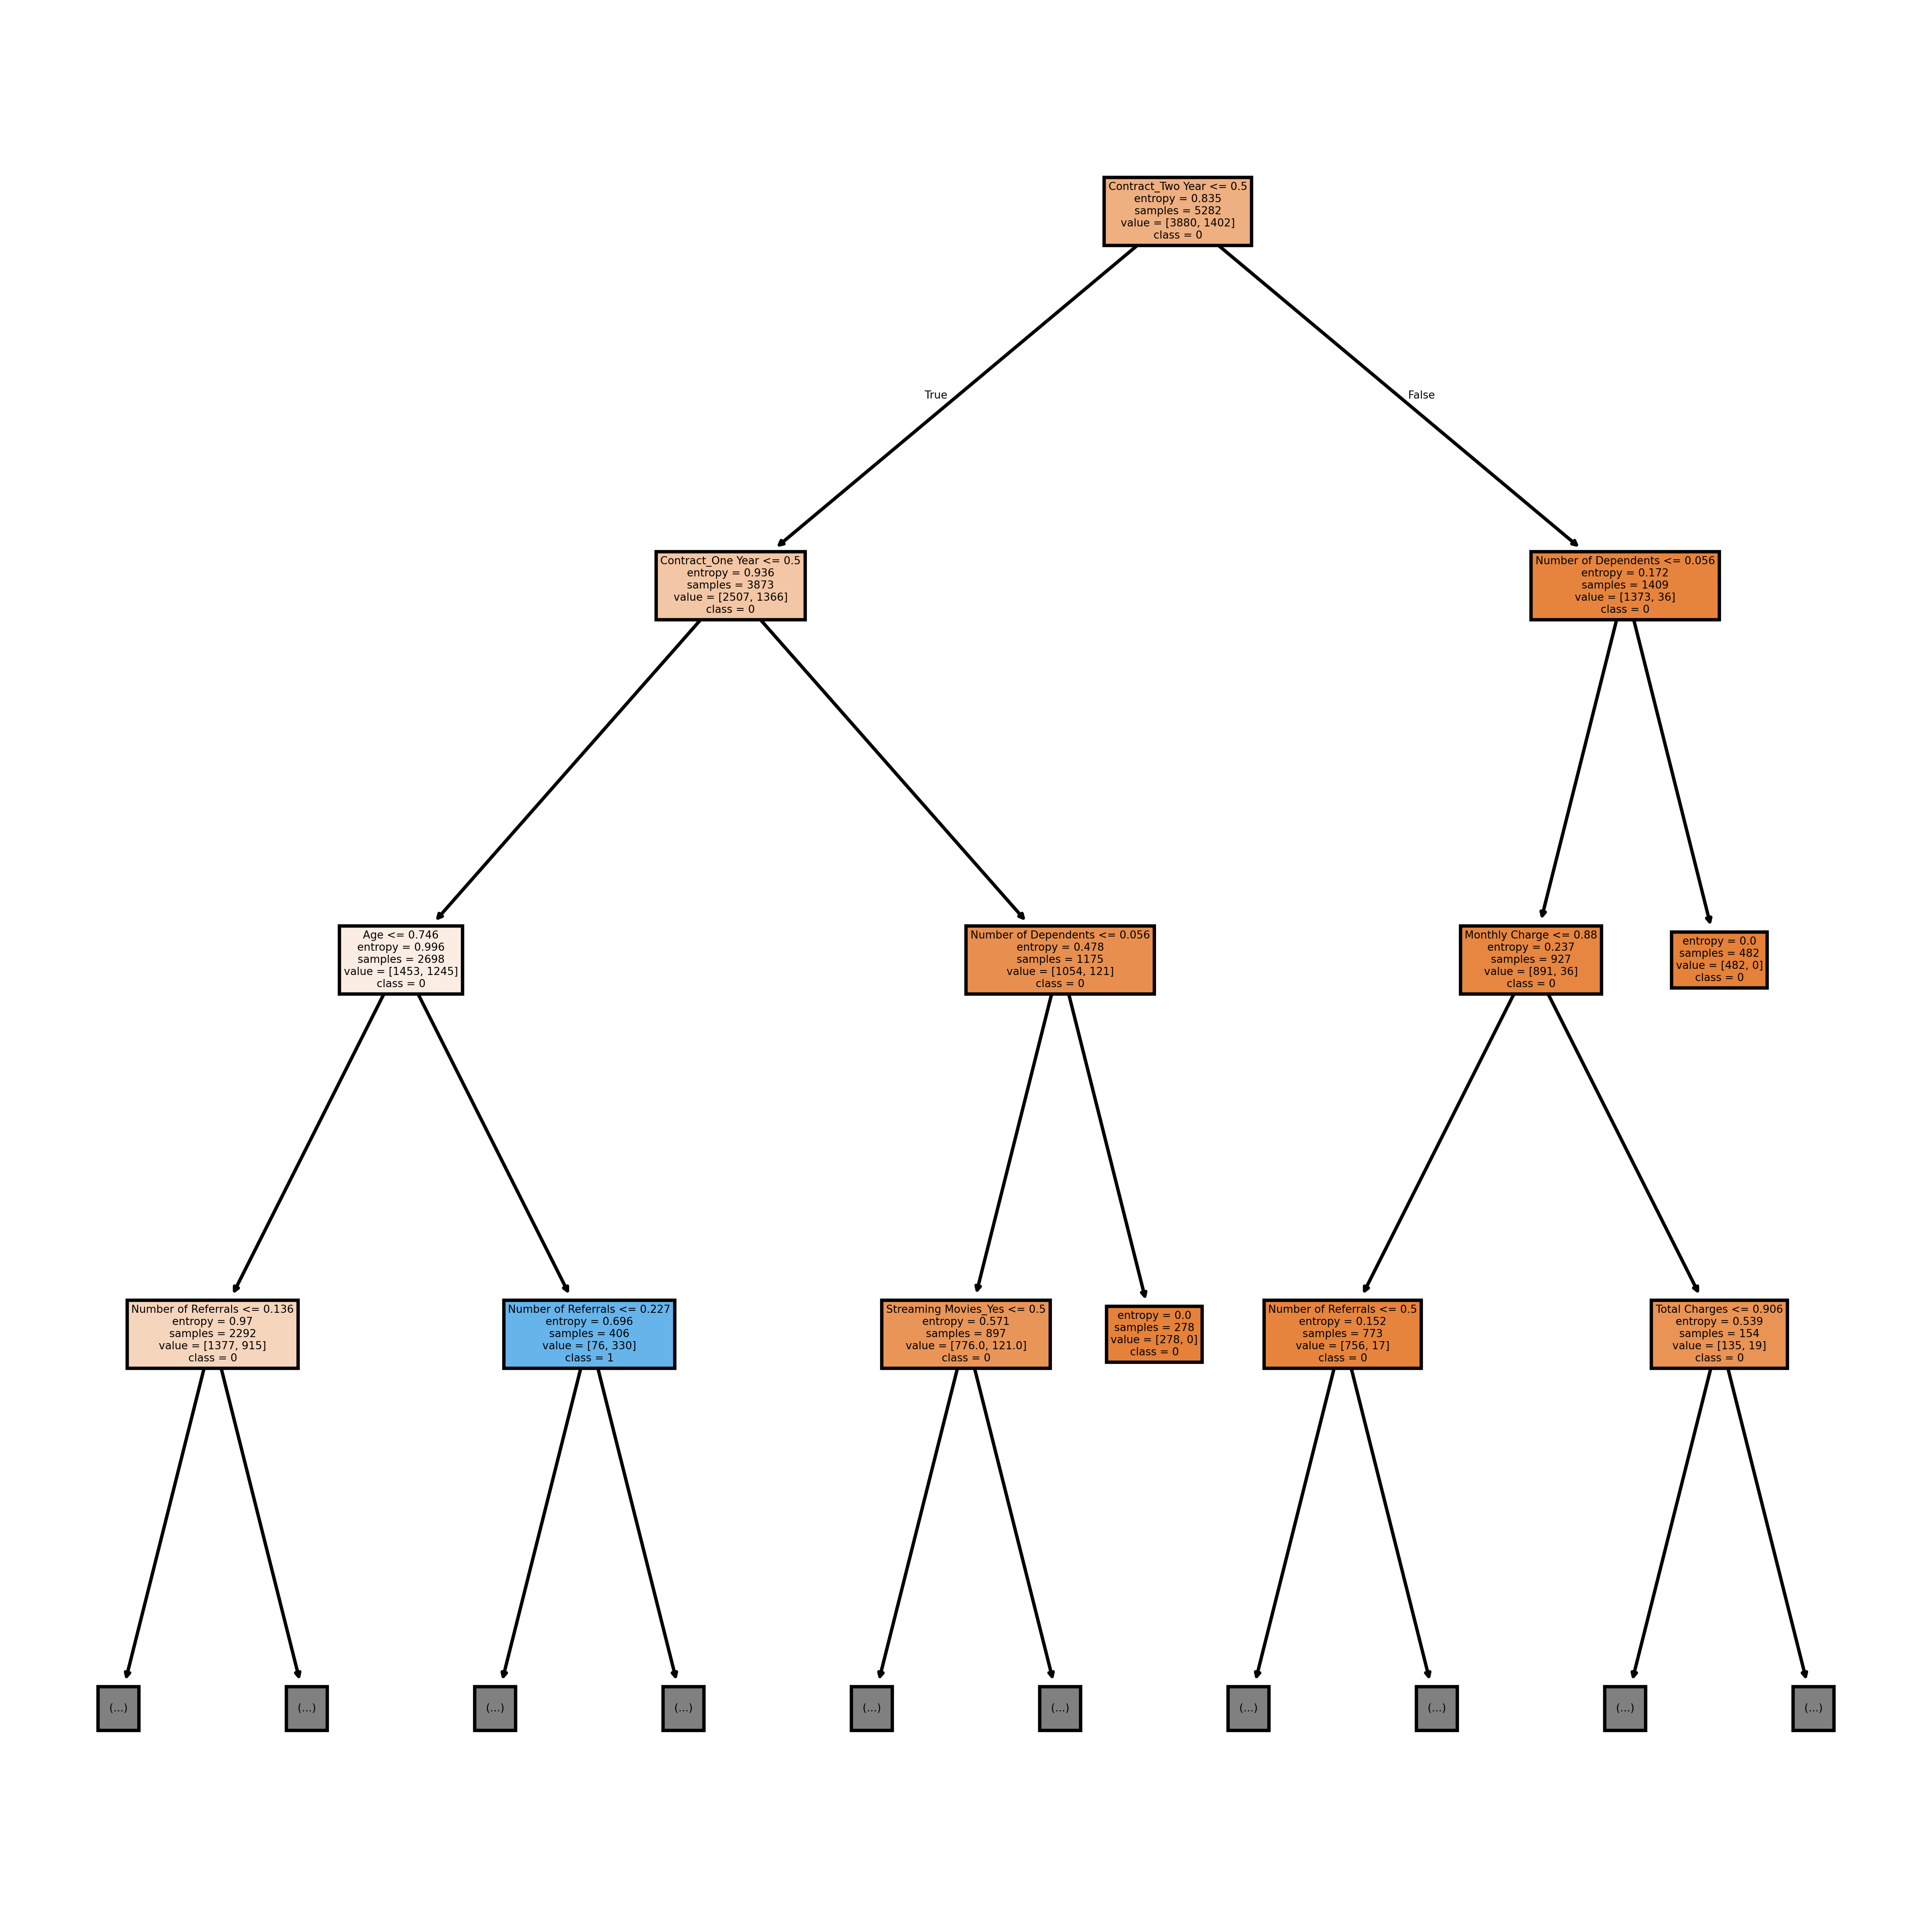

In [36]:
# Set max depth and higher DPI for better quality
max_depth = 3  # Adjust to show the desired number of levels
dpi_setting = 600  # Increase DPI for higher resolution

# Plot the decision tree with improved resolution
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=dpi_setting)
tree.plot_tree(clf,
               feature_names=X_train_full.columns, 
               class_names=np.unique(y).astype('str'),
               filled=True,
               max_depth=max_depth)
plt.show()

In [37]:
# Evaluate the predictive performance
y_preds = clf.predict(X_test_full)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.7898921067575241


In [38]:
# Generate the classification report
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1294
           1       0.60      0.61      0.61       467

    accuracy                           0.79      1761
   macro avg       0.73      0.73      0.73      1761
weighted avg       0.79      0.79      0.79      1761



#### Let's try to use Gini index as a hyperparameter

In [39]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state=42)

clf_gini.fit(X_train_full, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
clf_gini.score(X_train_full, y_train)

1.0

In [41]:
# on test set
y_preds_gini = clf_gini.predict(X_test_full)

In [42]:
acc = accuracy_score(y_test, y_preds_gini) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 77.96706416808632


#### Let's tune other hyperparameters 

In [43]:
# Stop it from running too long
tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10,  random_state=42)
tree_clf.fit(X_train_full, y_train)

# Accuracy on training data & test data
print('Training:', tree_clf.score(X_train_full, y_train))
print('Testing:', tree_clf.score(X_test_full, y_test))

Training: 0.8886785308595229
Testing: 0.8143100511073254


In [44]:
# Stop it from running too long
tree_clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 10,  random_state=42)
tree_clf_gini.fit(X_train_full, y_train)

# Accuracy on training data & test data
print('Training:', tree_clf_gini.score(X_train_full, y_train))
print('Testing:', tree_clf_gini.score(X_test_full, y_test))

Training: 0.8917076864823931
Testing: 0.8233957978421351


In [45]:
# increase min_samples_split size
tree_clf_min = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split=40, random_state=42)
tree_clf_min.fit(X_train_full, y_train)

# Accuracy on training data & test data
print('Training:', tree_clf_min.score(X_train_full, y_train))
print('Testing:', tree_clf_min.score(X_test_full, y_test))

Training: 0.8678530859522908
Testing: 0.8262350936967632


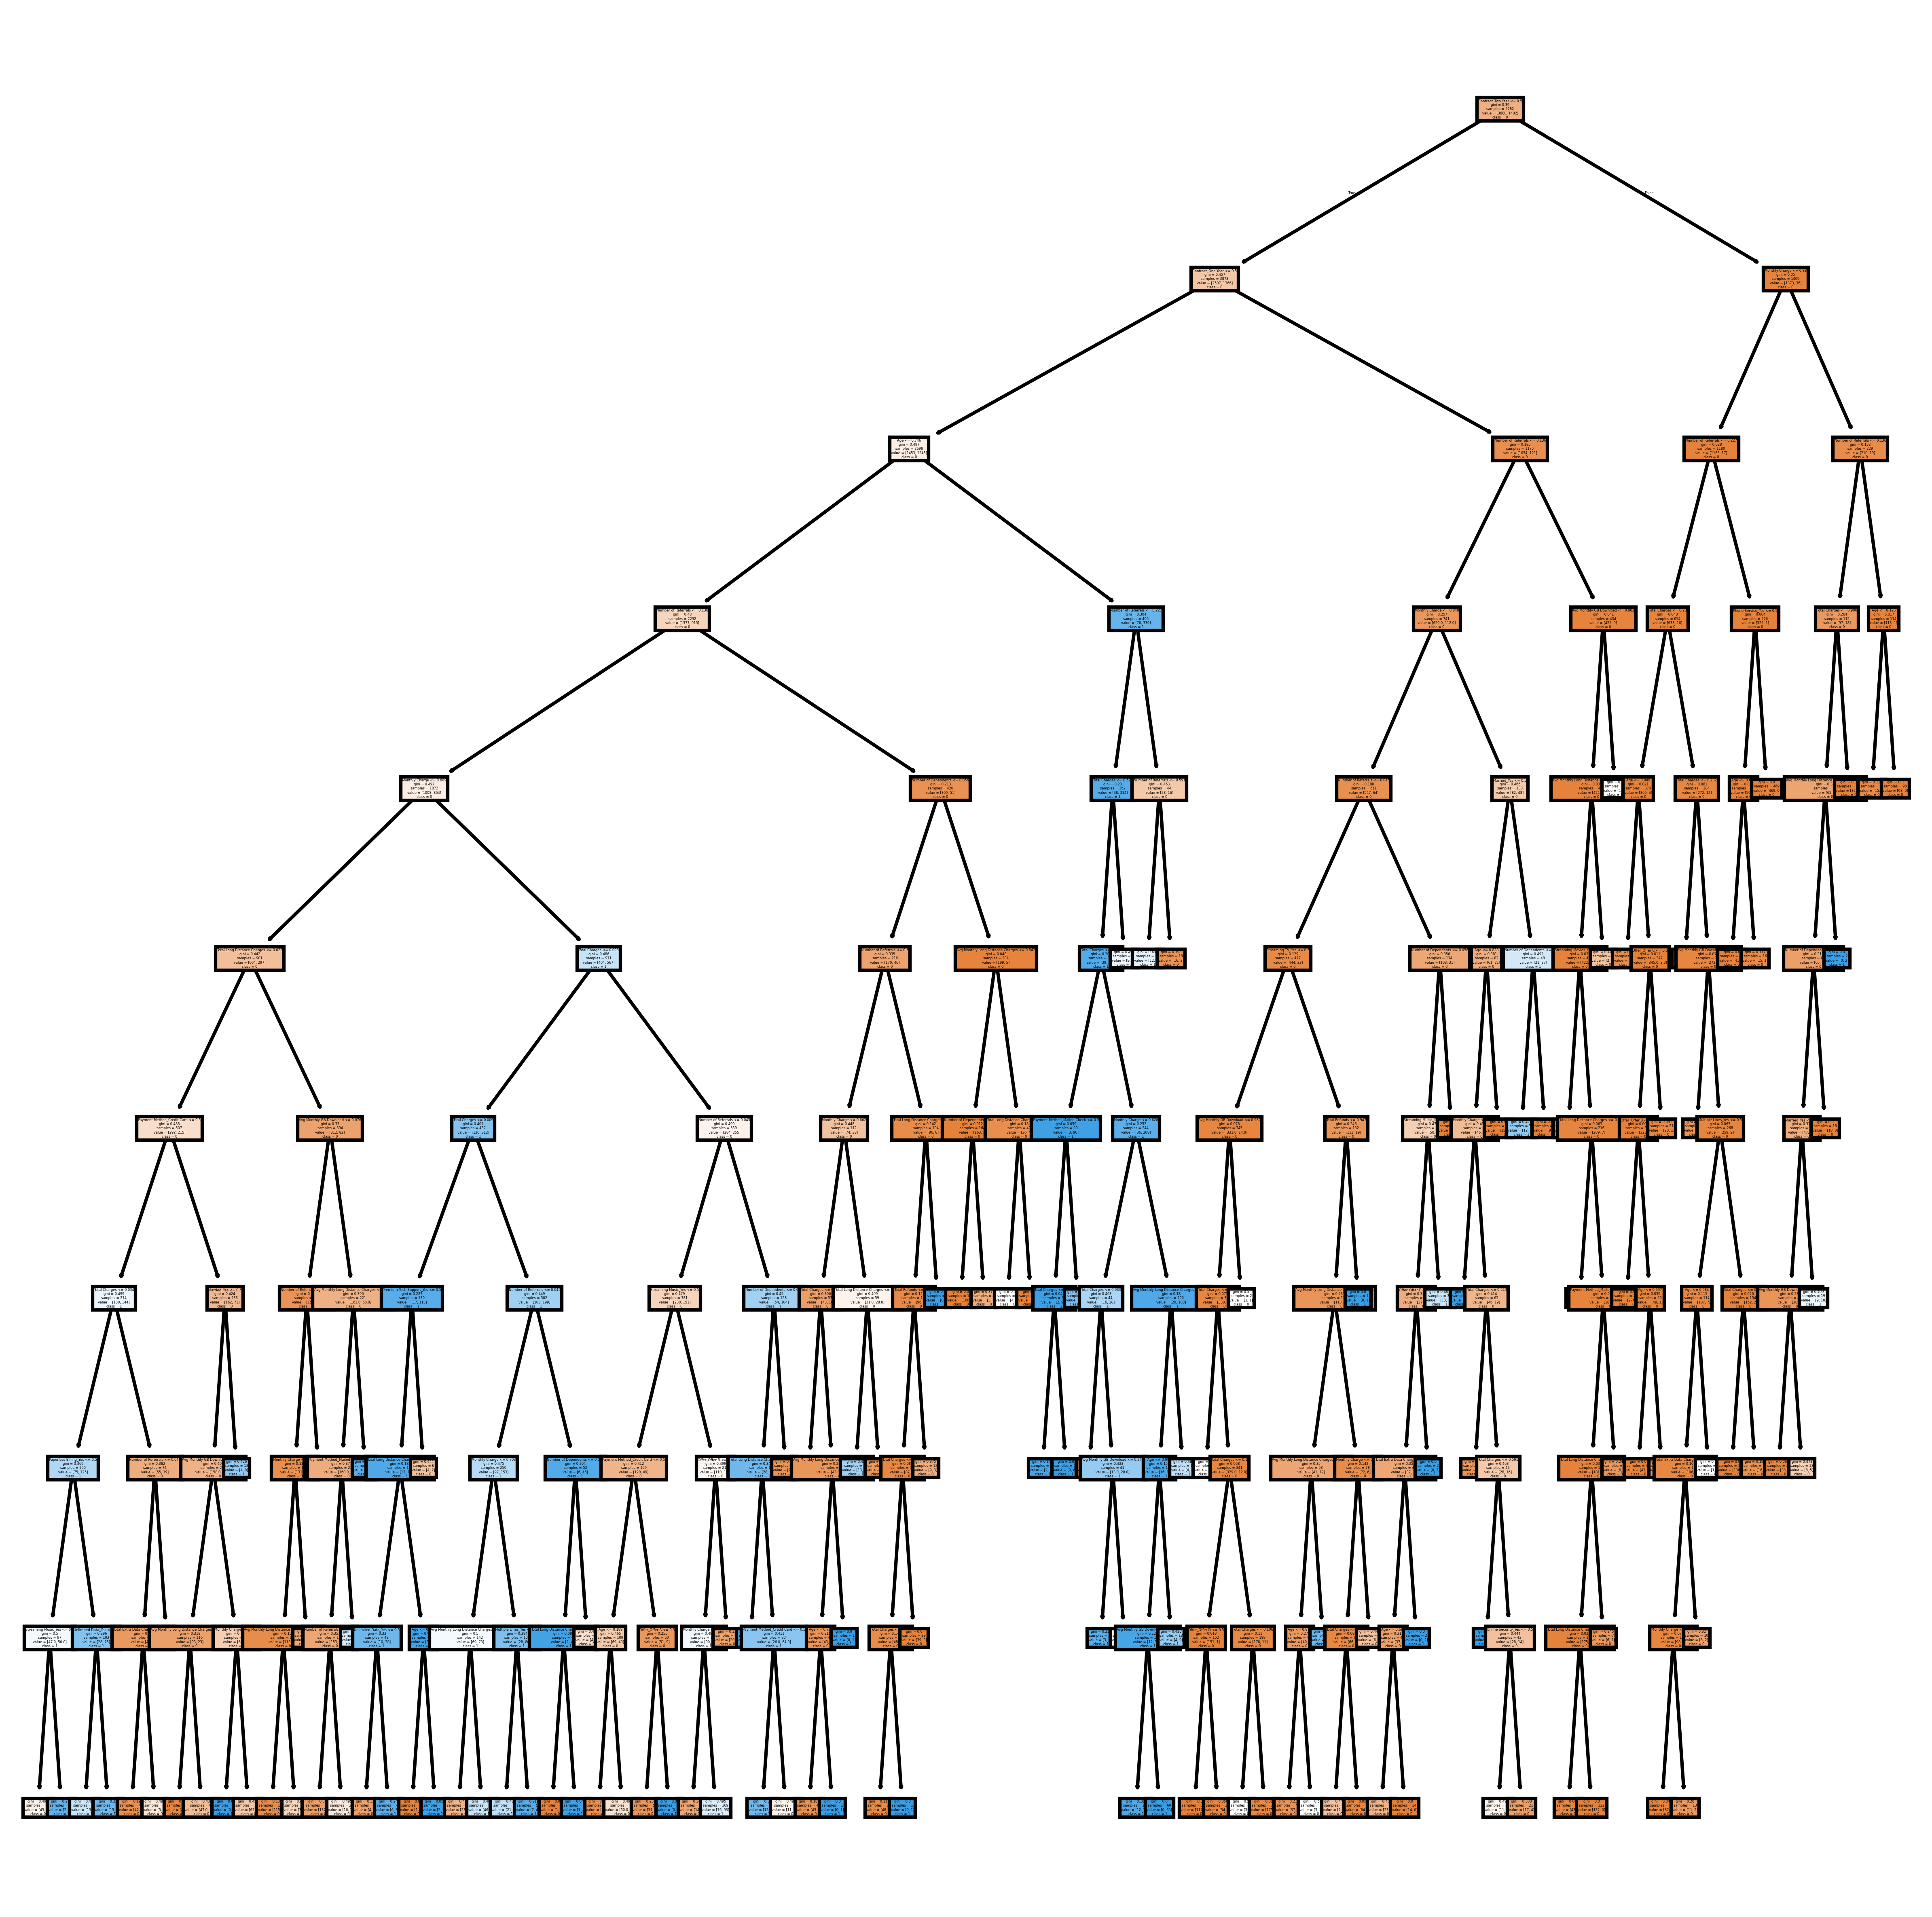

In [46]:
# Set max depth and higher DPI for better quality
max_depth = 3  # Adjust to show the desired number of levels
dpi_setting = 600  # Increase DPI for higher resolution

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=dpi_setting)
tree.plot_tree(tree_clf_min,
               feature_names=X_train_full.columns, 
               class_names=np.unique(y).astype('str'),
               filled=True)
plt.show()

#### But there is a class impalance as only 26.5% of the customers churn(1). Let's address that

## Dealing with the Target Imbalance. Pipiline with SMOTE

### Random Forest Classifier

#### SMOTENC allows you to specify which features are categorical, so it only generates synthetic samples for the numeric features and keeps categorical values as they are.


In [47]:
# Identify column types
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Apply preprocessing pipeline and then SMOTENC only on training data
# Define SMOTENC, indicating which columns are categorical by their indices
smote_nc = SMOTENC(categorical_features=[X_train.columns.get_loc(col) for col in categorical_features],
                   random_state=42)

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote_nc),
    ('classifier', RandomForestClassifier(random_state=42))
])

#### We can use Gridsearch for Hyperparameter Tuning and Cross-Validation

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      1294
           1       0.64      0.76      0.70       467

    accuracy                           0.82      1761
   macro avg       0.77      0.80      0.79      1761
weighted avg       0.84      0.82      0.83      1761

Accuracy Score: 0.8239636570130607
Recall: 0.7601713062098501


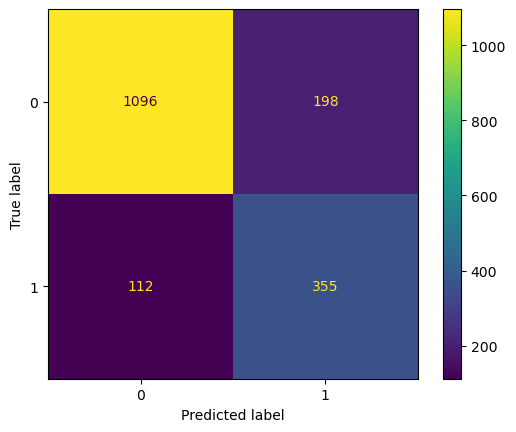

In [48]:
# Define a parameter grid for DecisionTreeClassifier
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 5, 15]
}

# Grid search on the training set with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate on test set only once, after selecting the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Fit the model
#pipeline.fit(X_train, y_train)
#y_pred = pipeline.predict(X_test)

# Print classification report for accuracy, precision, and other metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Print confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

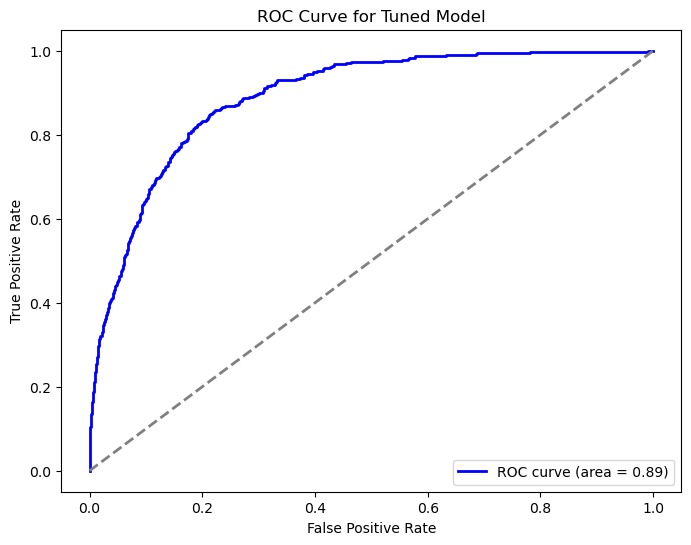

In [49]:
# Calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Model')
plt.legend(loc="lower right")
plt.show()

In [50]:
# Display the best parameters chosen by GridSearchCV
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Best parameters found by GridSearchCV: {'classifier__criterion': 'entropy', 'classifier__max_depth': 15, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 20}


#### Let's see what features influence the classification result the most

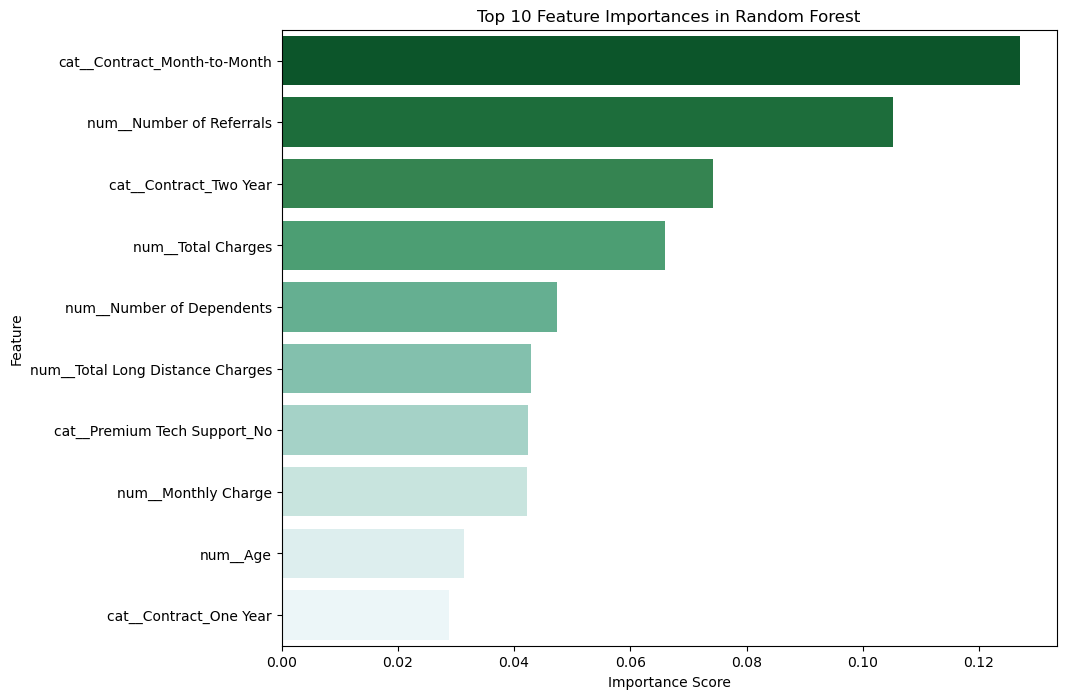

In [51]:
# Fit the preprocessor on X_train to get transformed feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

# Extract feature importances from the best RandomForest model in the pipeline
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Create a DataFrame to display feature importances with correct feature name
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
# sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='BuGn_r')  # Top 10 features for readability
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), hue='Feature', palette='BuGn_r', dodge=False, legend=False)


plt.title('Top 10 Feature Importances in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#### Features with higher importance scores have a stronger influence on the model’s decision-making process. While feature importance shows which features matter most, it does not indicate how they impact churn (positively or negatively).

## Pipeline without SMOTENC

#### Did oversampling really make a difference? let's check

Best parameters without SMOTENC: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 20}
Results without SMOTENC:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1294
           1       0.72      0.61      0.66       467

    accuracy                           0.83      1761
   macro avg       0.80      0.76      0.78      1761
weighted avg       0.83      0.83      0.83      1761

Accuracy Score: 0.8347529812606473
Recall: 0.6081370449678801


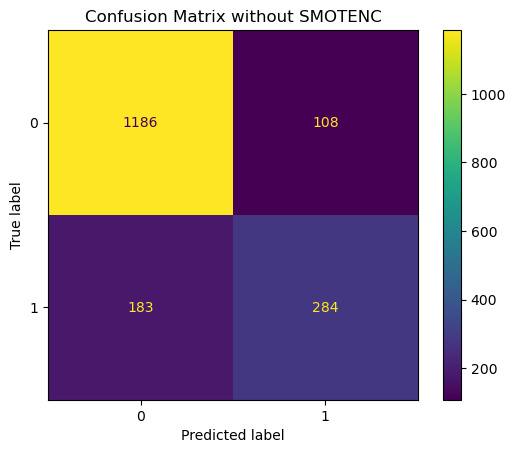

In [52]:
# Pipeline without SMOTENC
pipeline_without_smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Use GridSearchCV for hyperparameter tuning on the pipeline without SMOTENC
grid_search_without_smote = GridSearchCV(pipeline_without_smote, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_without_smote.fit(X_train, y_train)

# Display the best parameters for the model without SMOTENC
print("Best parameters without SMOTENC:", grid_search_without_smote.best_params_)

# Get the best model and evaluate it on the test set
best_model_without_smote = grid_search_without_smote.best_estimator_
y_pred_without_smote = best_model_without_smote.predict(X_test)

# Print classification report and other metrics for the best model without SMOTENC
print("Results without SMOTENC:")
print(classification_report(y_test, y_pred_without_smote))
print("Accuracy Score:", accuracy_score(y_test, y_pred_without_smote))
print("Recall:", recall_score(y_test, y_pred_without_smote))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model_without_smote, X_test, y_test)
plt.title("Confusion Matrix without SMOTENC")
plt.show()

In [53]:
# Fit and evaluate the grid search results for each
print("Best parameters without SMOTENC:", grid_search_without_smote.fit(X_train, y_train).best_params_)

Best parameters without SMOTENC: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 20}


#### For churn prediction, we prioritize recall for the minority class (class 1) since it's more critical to catch as many churn cases as possible. Therefore, the SMOTENC model looks better, as it improves recall and F1-score for class 1. For an overall balanced view, the F1-score can be helpful, and it’s slightly higher with SMOTENC (0.69 vs. 0.65 for class 1).

## Logistic Regression Classifier

Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}
Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1294
           1       0.58      0.80      0.67       467

    accuracy                           0.79      1761
   macro avg       0.75      0.79      0.76      1761
weighted avg       0.83      0.79      0.80      1761

Accuracy Score: 0.7910278250993753
Recall: 0.8008565310492506


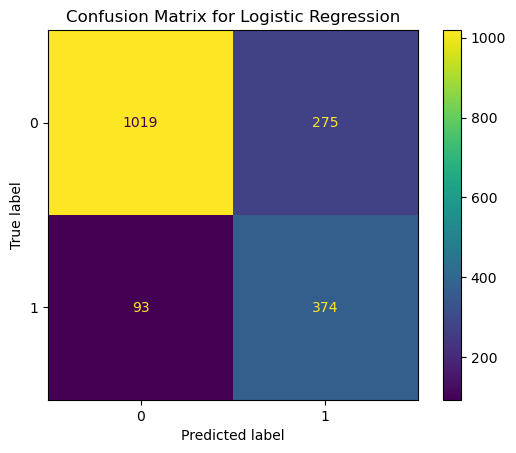

In [54]:
# Define a pipeline for Logistic Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote_nc),             # SMOTENC for handling categorical data
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Define a parameter grid for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    #'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['lbfgs', 'saga']
}

# Run GridSearchCV to tune Logistic Regression
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Display the best parameters for Logistic Regression
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

# Get the best model and evaluate on the test set
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)
y_pred_proba_lr_smote = best_model_lr.predict_proba(X_test)[:, 1]  # For ROC curve

# Print classification report and other metrics for Logistic Regression
print("Results for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))

# Display Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(best_model_lr, X_test, y_test)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

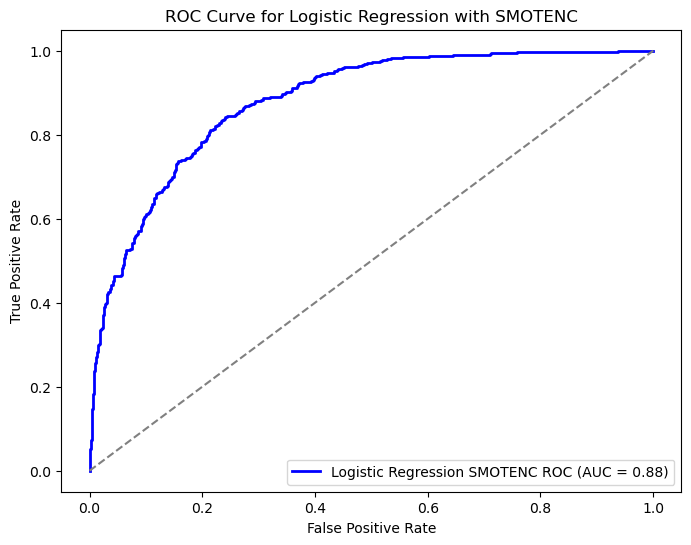

In [55]:
# Plot ROC curve for Logistic Regression with SMOTENC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr_smote)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression SMOTENC ROC (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with SMOTENC')
plt.legend(loc="lower right")
plt.show()

#### The Random Forest model shows a slight advantage over Logistic Regression in terms of overall prediction accuracy (82% vs. 79%) and ROC AUC (0.89 vs. 0.88), indicating it’s more effective at distinguishing between churners and non-churners across thresholds. While Logistic Regression achieves a higher recall of 80% (compared to 76% for Random Forest), meaning it captures more actual churners, Random Forest balances this with a better precision of 64% for predicting churn, reducing false positives. This balance helps minimize misclassifications where non-churners are incorrectly flagged as likely to leave, which can save resources when targeting retention efforts.

#### In choosing a model, Random Forest stands out due to its overall higher accuracy and balanced performance between precision and recall, making it more reliable in capturing key churn patterns. Its ability to model complex relationships allows it to adapt better to the nuances of customer behavior, making it a stronger choice for prioritizing both accuracy and practical application in targeted retention strategies.